In [3]:
# Import Library
import numpy as np
from PIL import Image
import matplotlib.pylab as plt

In [4]:
image=plt.imread("Sigewinne.jpg")
image.shape

(1440, 2560, 3)

In [5]:
# Display Image

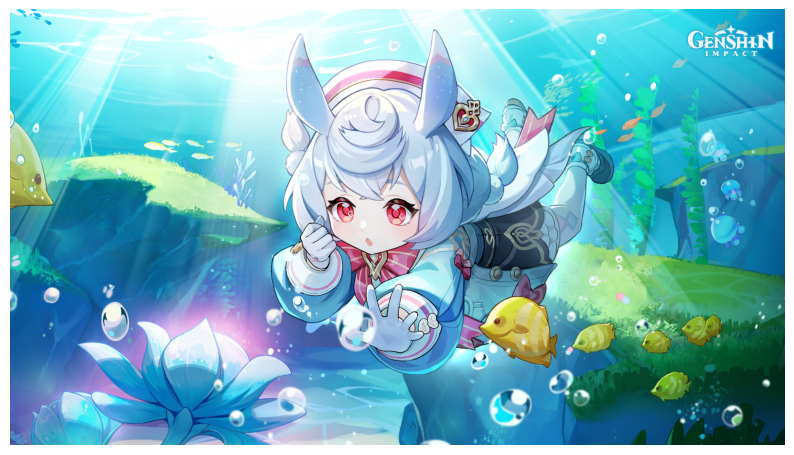

In [6]:
fig,ax=plt.subplots(figsize=(10,10))
ax.imshow(image)
ax.axis('off')
plt.show()

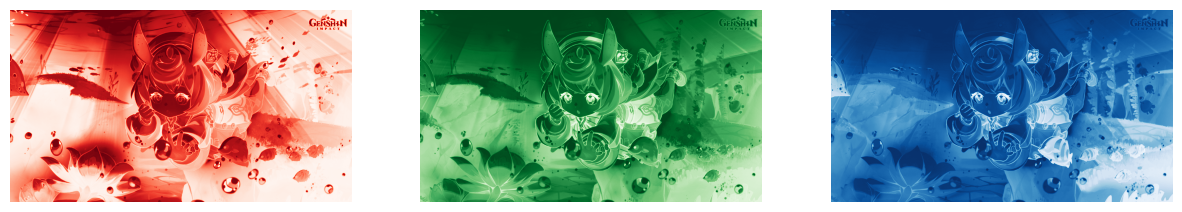

In [7]:
# Display the RGB Channels

fig,axs=plt.subplots(1,3,figsize=(15,5))
axs[0].imshow(image[:,:,0], cmap='Reds')
axs[1].imshow(image[:,:,1], cmap='Greens')
axs[2].imshow(image[:,:,2], cmap='Blues')
axs[0].axis('off')
axs[1].axis('off')
axs[2].axis('off')
plt.show()

In [8]:
# Capture RGB
R_image=image[:,:,0]
G_image=image[:,:,0]
B_image=image[:,:,0]

In [9]:
# Buat nilai Gamma dan konstan RGB untuk mengubah gambar menjadi greyscale
gamma=1.04
r_const, g_const, b_const=0.2126, 0.7152, 0.0722


In [10]:
Grey_image=r_const * R_image ** gamma + g_const * G_image ** gamma + b_const * B_image ** gamma

In [11]:
# Fungsi untuk menampilkan gambar
def display_images(image):
    fig,ax=plt.subplots(figsize=(10,10))
    ax.imshow(image,cmap='gray')
    ax.axis('off')
    plt.show()

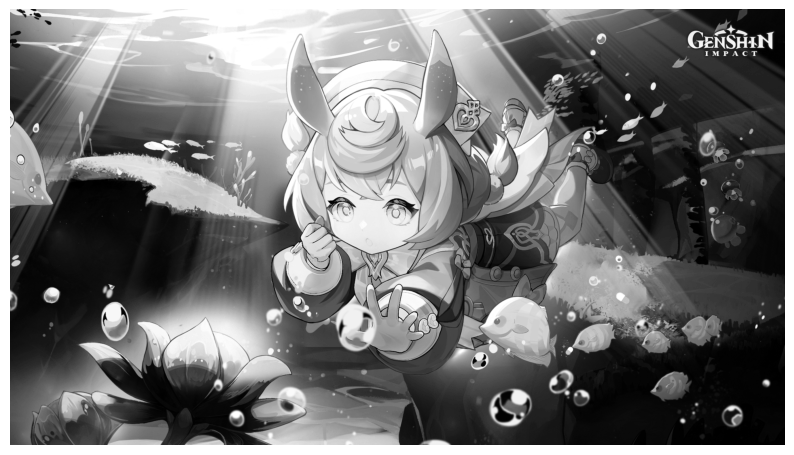

In [12]:
display_images(G_image)

In [13]:
def convolve2d_manual(image, kernel):
    # Ukuran gambar dan kernel
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape

    pad_height = kernel_height // 2
    pad_width = kernel_width // 2
    
    # Tambahkan padding dengan nilai 0 di sekitar gambar
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant')
    
    # Buat array kosong untuk menyimpan hasil konvolusi
    output_image = np.zeros((image_height, image_width))
    
    # Lakukan operasi konvolusi
    for i in range(image_height):
        for j in range(image_width):
            region = padded_image[i:i+kernel_height, j:j+kernel_width]
            output_image[i, j] = np.sum(region * kernel)
    output_image = np.clip(output_image, 0, 255)
    
    return output_image.astype(np.uint8)

In [14]:
kernels={
     "sharpen_kernel" : np.array([[0, -1, 0],
                               [-1, 5, -1],
                               [0, -1, 0]]),
     "blur_kernel" : np.array([[1/9, 1/9, 1/9],
                        [1/9, 1/9, 1/9],
                        [1/9, 1/9, 1/9]]),
     "sobel_kernel_vertical" : np.array([[-1, 0, 1],
                                  [-2, 0, 2],
                                  [-1, 0, 1]]),
     "gaussian_kernel" : np.array([[1/16, 1/8, 1/16],
                            [1/8,  1/4,  1/8],
                            [1/16, 1/8, 1/16]]),
     "edge_kernel" : np.array([[0, -1, 0],
                             [-1, 4, -1],
                             [0, -1, 0]])

 }

In [15]:
# Panggil Fungsi convolve
sharpen_image=convolve2d_manual(G_image,kernels["sharpen_kernel"])
blur_image=convolve2d_manual(G_image,kernels["blur_kernel"])
sobel_kernel_v_image=convolve2d_manual(G_image,kernels["sobel_kernel_vertical"])
gaussian_image=convolve2d_manual(G_image,kernels["gaussian_kernel"])
edge_image=convolve2d_manual(G_image,kernels["edge_kernel"])


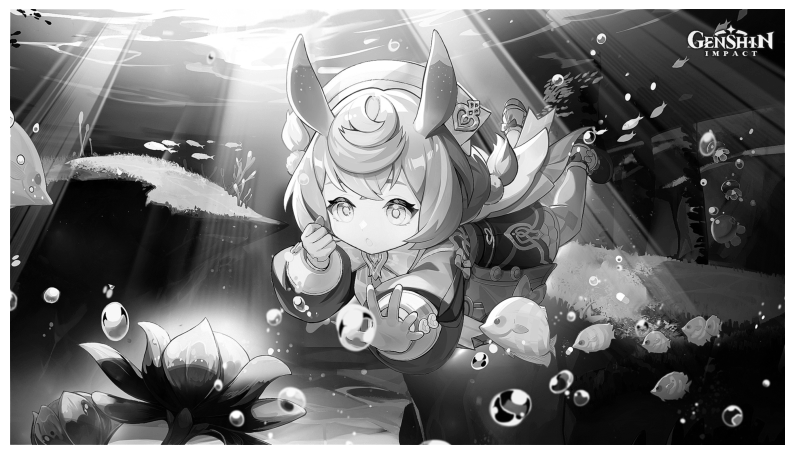

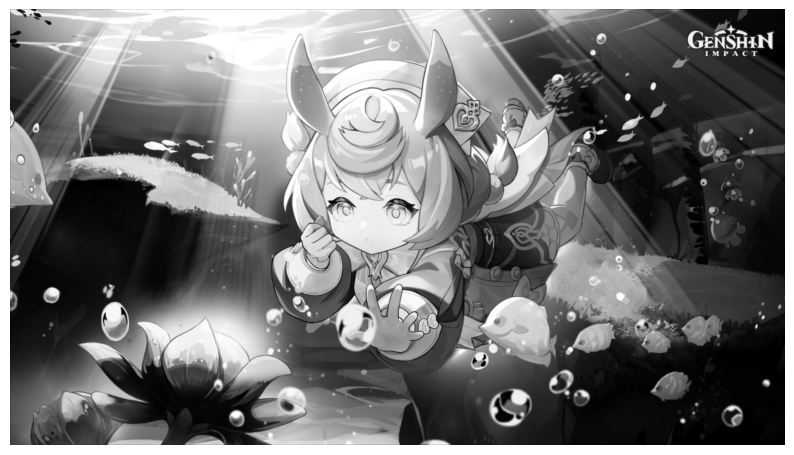

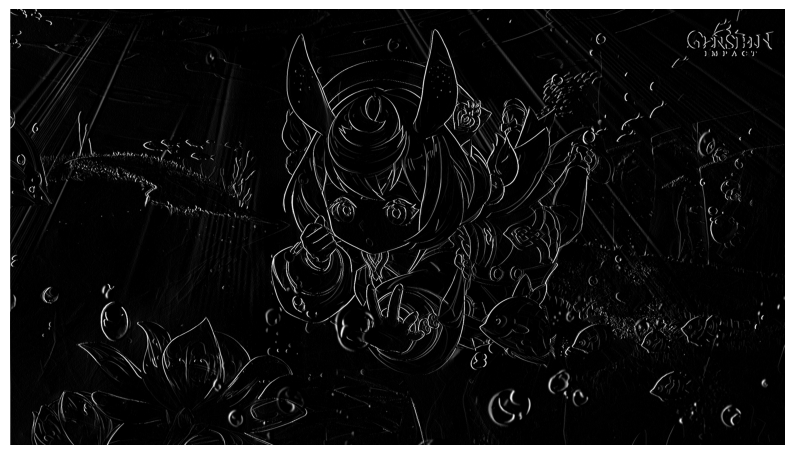

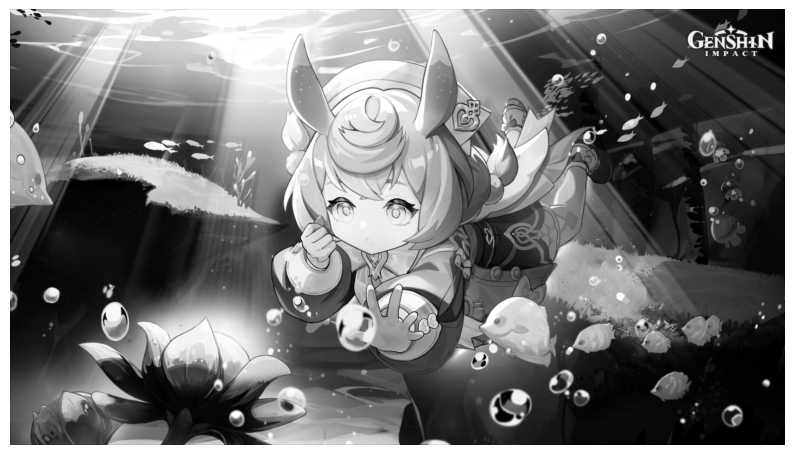

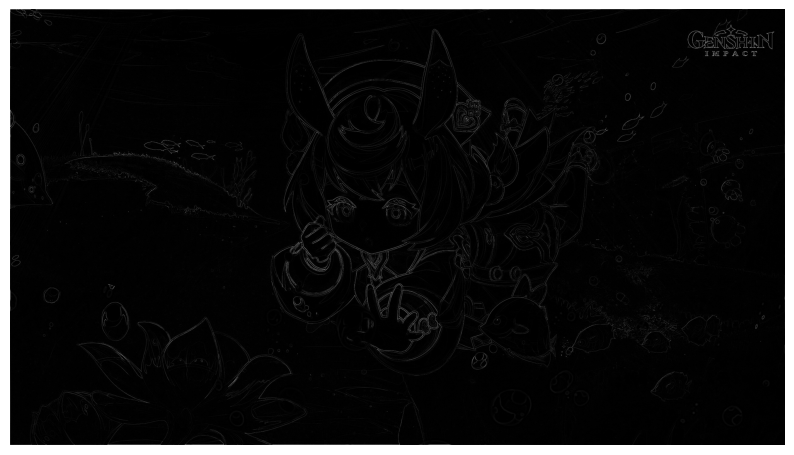

In [16]:
# Jangan lupa Display 
display_images(sharpen_image)
display_images(blur_image)
display_images(sobel_kernel_v_image)
display_images(gaussian_image)
display_images(edge_image)

In [17]:
def max_pooling(image, pool_size=2, stride=2):
    image_height, image_width = image.shape
    
    # Ukuran output
    output_height = (image_height - pool_size) // stride + 1
    output_width = (image_width - pool_size) // stride + 1
    
    pooled_image = np.zeros((output_height, output_width))
    
    # Lakukan max pooling
    for i in range(0, image_height - pool_size + 1, stride):
        for j in range(0, image_width - pool_size + 1, stride):
            region = image[i:i + pool_size, j:j + pool_size]
            # Simpan nilai maksimum ke dalam gambar hasil pooling
            pooled_image[i // stride, j // stride] = np.max(region)
    
    return pooled_image.astype(np.uint8)

In [18]:
def average_pooling(image, pool_size=2, stride=2):
    image_height, image_width = image.shape
    
    # Ukuran output
    output_height = (image_height - pool_size) // stride + 1
    output_width = (image_width - pool_size) // stride + 1
    
    pooled_image = np.zeros((output_height, output_width))
    
    # Lakukan average pooling
    for i in range(0, image_height - pool_size + 1, stride):
        for j in range(0, image_width - pool_size + 1, stride):
            region = image[i:i + pool_size, j:j + pool_size]
            # Simpan rata-rata nilai ke dalam gambar hasil pooling
            pooled_image[i // stride, j // stride] = np.mean(region)
    
    return pooled_image.astype(np.uint8)

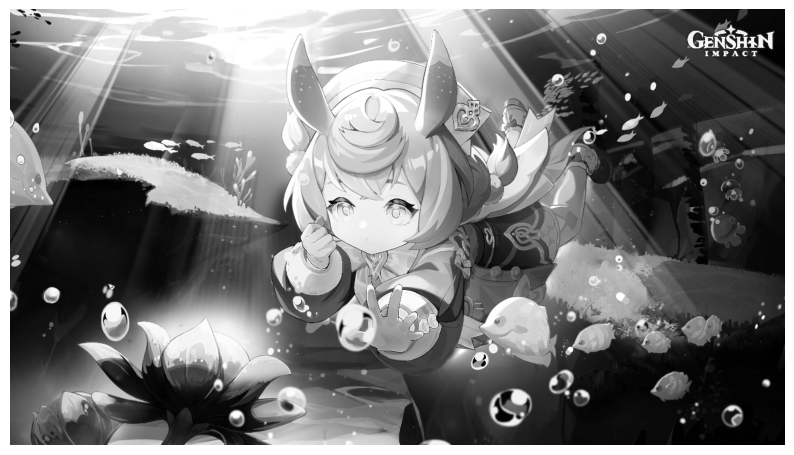

In [19]:
Grey_image=max_pooling(G_image)
display_images(Grey_image)

In [20]:
# Terdapat pengurangan ukuran matrix

In [21]:
# Matrix Awal
G_image.shape

(1440, 2560)

In [22]:
# Matrix Akhir
Grey_image.shape

(720, 1280)

In [23]:
# Flattening digunakan untuk membuat data bisa terinput ke neural network 
# Ini bekerja dengan membuat matrix gambar menjadi vektor 1 dimensi
flattened_gray_image=Grey_image.flatten()
print(flattened_gray_image)

[229 229 230 ...   1   1   1]
